In [13]:
# importing the visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession


# starting sparksession
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [3]:
# retrieving the KDDCup data from its URL - getting data into the env
import urllib.request 
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz", "kddcup.data.gz")


('kddcup.data.gz', <http.client.HTTPMessage at 0x7f99dc1a50d0>)

In [4]:

# Creating DataFrame based on the content of KDDCup file.
df = spark.read.csv("./kddcup.data.gz", inferSchema=True)
df.show()


+---+---+----+---+---+-----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|_c0|_c1| _c2|_c3|_c4|  _c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|   _c41|
+---+---+----+---+---+-----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|  0|tcp|http| SF|215|45076|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   1| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0|   0|   0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0|normal.|
|  0|tcp|http| SF|162| 4528|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   2|   2| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0|   1|   1| 1.0| 0.0

In [12]:
# checking columns
df.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41']

In [5]:
# Renaming the columns
df2 = df.withColumnRenamed("_c0","duration") \
    .withColumnRenamed("_c1","protocol_type")\
    .withColumnRenamed("_c2","service")\
    .withColumnRenamed("_c3","flag")\
    .withColumnRenamed("_c4","src_bytes")\
    .withColumnRenamed("_c5","dst_bytes")\
    .withColumnRenamed("_c6","land")\
    .withColumnRenamed("_c7","wrong_fragment")\
    .withColumnRenamed("_c8","urgent")\
    .withColumnRenamed("_c9","host")\
    .withColumnRenamed("_c10","num_failed_logins")\
    .withColumnRenamed("_c11","logged_in")\
    .withColumnRenamed("_c12","num_compromised")\
    .withColumnRenamed("_c13","root_shell")\
    .withColumnRenamed("_c14","su_attempted")\
    .withColumnRenamed("_c15","num_root")\
    .withColumnRenamed("_c16","num_file_creations")\
    .withColumnRenamed("_c17","num_shells")\
    .withColumnRenamed("_c18","num_access_files")\
    .withColumnRenamed("_c19","num_outbound_cmds")\
    .withColumnRenamed("_c20","is_host_login")\
    .withColumnRenamed("_c21","is_guest_login")\
    .withColumnRenamed("_c22","count")\
    .withColumnRenamed("_c23","srv_count")\
    .withColumnRenamed("_c24","serror_rate")\
    .withColumnRenamed("_c25","srv_serror_rate")\
    .withColumnRenamed("_c26","rerror_rate")\
    .withColumnRenamed("_c27","srv_rerror_rate")\
    .withColumnRenamed("_c28","same_srv_rate")\
    .withColumnRenamed("_c29","diff_srv_rate")\
    .withColumnRenamed("_c30","srv_diff_host_rate")\
    .withColumnRenamed("_c31","dst_host_count")\
    .withColumnRenamed("_c32","dst_host_srv_count")\
    .withColumnRenamed("_c33","dst_host_same_srv_rate")\
    .withColumnRenamed("_c34","dst_host_diff_srv_rate")\
    .withColumnRenamed("_c35","dst_host_same_src_port_rate")\
    .withColumnRenamed("_c36","dst_host_srv_diff_host_rate")\
    .withColumnRenamed("_c37","dst_host_serror_rate")\
    .withColumnRenamed("_c38","dst_host_srv_serror_rate")\
    .withColumnRenamed("_c39","dst_host_rerror_rate")\
    .withColumnRenamed("_c40","dst_host_srv_rerror_rate")\
    .withColumnRenamed("_c41","connection_status")



In [6]:
df2.printSchema()

root
 |-- duration: integer (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- host: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_compromised: integer (nullable = true)
 |-- root_shell: integer (nullable = true)
 |-- su_attempted: integer (nullable = true)
 |-- num_root: integer (nullable = true)
 |-- num_file_creations: integer (nullable = true)
 |-- num_shells: integer (nullable = true)
 |-- num_access_files: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = tru

In [15]:
#Number of rows in the dataset
df2.count()

4898431

In [16]:
len(df.columns)

42

In [7]:
# creating temp view
df2.createOrReplaceTempView('KDDView')

In [8]:
# selecting all
sqlDF = spark.sql('SELECT * FROM KDDView')
sqlDF.show(10)

+--------+-------------+-------+----+---------+---------+----+--------------+------+----+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-----------------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|host|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_

## Query 1: List the number of connections for different connections’ statuses



In [10]:
sqlDF = spark.sql('SELECT connection_status, COUNT(*) as countOfConnectionStatus from KDDView GROUP BY connection_status ORDER BY countOfConnectionStatus')
sqlDF.show()

+-----------------+-----------------------+
|connection_status|countOfConnectionStatus|
+-----------------+-----------------------+
|             spy.|                      2|
|            perl.|                      3|
|             phf.|                      4|
|        multihop.|                      7|
|       ftp_write.|                      8|
|      loadmodule.|                      9|
|         rootkit.|                     10|
|            imap.|                     12|
|     warezmaster.|                     20|
|            land.|                     21|
| buffer_overflow.|                     30|
|    guess_passwd.|                     53|
|             pod.|                    264|
|        teardrop.|                    979|
|     warezclient.|                   1020|
|            back.|                   2203|
|            nmap.|                   2316|
|       portsweep.|                  10413|
|         ipsweep.|                  12481|
|           satan.|             

In [11]:
# converting sql DF to pandas DF
pandasDF = sqlDF.toPandas()

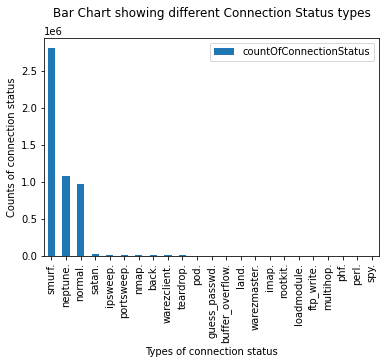

In [16]:
# plotting connection status by types - high skewness
pandasDF.sort_values('countOfConnectionStatus', ascending=False).plot(x='connection_status', y='countOfConnectionStatus', kind='bar')
plt.title('Bar Chart showing different Connection Status types\n')
plt.xlabel('Types of connection status')
plt.ylabel('Counts of connection status');

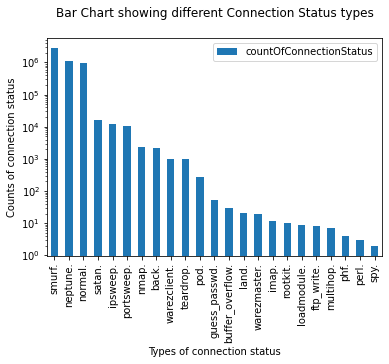

In [18]:
# plotting connection status by types - reduce skewness (distortion)
pandasDF.sort_values('countOfConnectionStatus', ascending=False).plot(x='connection_status', y='countOfConnectionStatus', kind='bar', logy=True);
plt.title('Bar Chart showing different Connection Status types\n')
plt.xlabel('Types of connection status')
plt.ylabel('Counts of connection status');

## Query 2: List the number of connections


In [20]:
# Finding the number of connections available
sqlDF = spark.sql("SELECT protocol_type, COUNT(*) as countOfProtocolTypes FROM KDDView GROUP BY protocol_type")
pandasDF = sqlDF.toPandas()
PandasDF

,protocol_type,countOfProtocolTypes
0,tcp,1870598
1,udp,194288
2,icmp,2833545


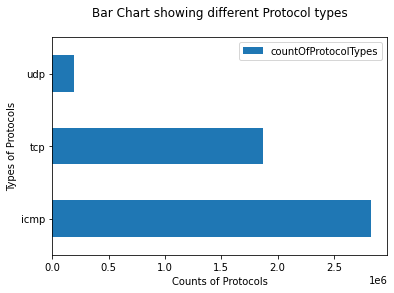

In [22]:
pandasDF.sort_values(by='countOfProtocolTypes',ascending=False).plot(x ='protocol_type', y='countOfProtocolTypes', kind = 'barh')
plt.title('Bar Chart showing different Protocol types\n')
plt.ylabel('Types of Protocols')
plt.xlabel('Counts of Protocols');

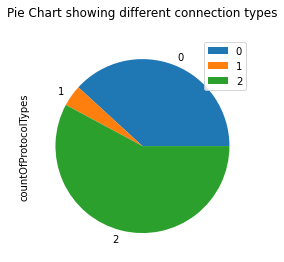

In [25]:
# plotting pie chart
pandasDF.plot(x ='protocol_type', y='countOfProtocolTypes', kind = 'pie');
plt.title('Pie Chart showing different connection types\n');

## Query 3: List the name of services used for udp connections which is not host login. We use DISTINCT to eliminates duplicate records from the results 



In [26]:
sqlDF = spark.sql("SELECT DISTINCT service from KDDView WHERE is_host_login=0 and protocol_type='udp'") 
sqlDF.show()

+--------+
| service|
+--------+
|   ntp_u|
|  tftp_u|
|domain_u|
|   other|
| private|
+--------+



## Query 4: List the number of different services used for udp connections which is not host login.

In [27]:
sqlDF = spark.sql("SELECT service, count(*) as countOfServiceTypes from KDDView where is_host_login=0 and protocol_type='udp' group by service;")
sqlDF.show()

+--------+-------------------+
| service|countOfServiceTypes|
+--------+-------------------+
|   ntp_u|               3833|
|  tftp_u|                  3|
|domain_u|              57782|
|   other|              56155|
| private|              76515|
+--------+-------------------+



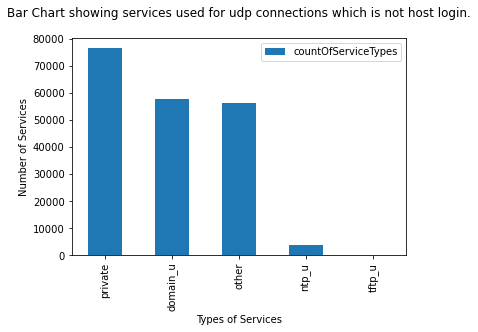

In [28]:
pandasDF = sqlDF.toPandas()
pandasDF.sort_values(by='countOfServiceTypes',ascending=False).plot(x ='service', y='countOfServiceTypes', kind = 'bar')
plt.title('Bar Chart showing services used for udp connections which is not host login.\n')
plt.xlabel('Types of Services')
plt.ylabel('Number of Services');


## Query 5: List the different types of bad connections.

In [30]:
#sqlDF = spark.sql('SELECT DISTINCT connection_status FROM KDDView WHERE connection_status <> "normal."')
pandasDF = sqlDF.toPandas()
pandasDF

,connection_status
0,warezmaster.
1,smurf.
2,pod.
3,imap.
4,nmap.
5,guess_passwd.
6,ipsweep.
7,portsweep.
8,satan.
9,land.


## Query 6: List the number of different types of bad connections.

In [31]:
sqlDF = spark.sql("SELECT connection_status, COUNT(*) as countOfBadConnetionTypes FROM KDDView WHERE connection_status<>'normal.' GROUP BY connection_status ORDER BY countOfBadConnetionTypes DESC") 
sqlDF.show()

+-----------------+------------------------+
|connection_status|countOfBadConnetionTypes|
+-----------------+------------------------+
|           smurf.|                 2807886|
|         neptune.|                 1072017|
|           satan.|                   15892|
|         ipsweep.|                   12481|
|       portsweep.|                   10413|
|            nmap.|                    2316|
|            back.|                    2203|
|     warezclient.|                    1020|
|        teardrop.|                     979|
|             pod.|                     264|
|    guess_passwd.|                      53|
| buffer_overflow.|                      30|
|            land.|                      21|
|     warezmaster.|                      20|
|            imap.|                      12|
|         rootkit.|                      10|
|      loadmodule.|                       9|
|       ftp_write.|                       8|
|        multihop.|                       7|
|         

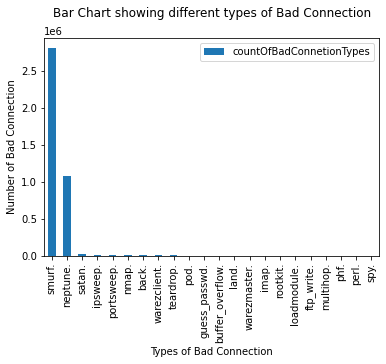

In [34]:
#pandasDF = sqlDF.toPandas()
pandasDF.plot(x ='connection_status', y='countOfBadConnetionTypes', kind = 'bar')
plt.title('Bar Chart showing different types of Bad Connection\n')
plt.xlabel('Types of Bad Connection')
plt.ylabel('Number of Bad Connection');

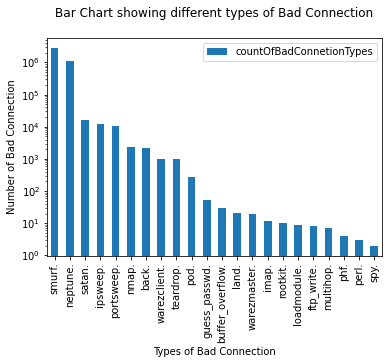

In [35]:
# using log scale on y axis
pandasDF.plot(x ='connection_status', y='countOfBadConnetionTypes', kind = 'bar', logy=True)
plt.title('Bar Chart showing different types of Bad Connection\n')
plt.xlabel('Types of Bad Connection')
plt.ylabel('Number of Bad Connection');

## Query 8: List the services based on the received destination packet’s bytes and the tcp protocol.

In [36]:
sqlDF = spark.sql("SELECT service, count(*) as countOfServiceTypes from KDDView WHERE dst_bytes>1000 and protocol_type='tcp' GROUP BY service") 

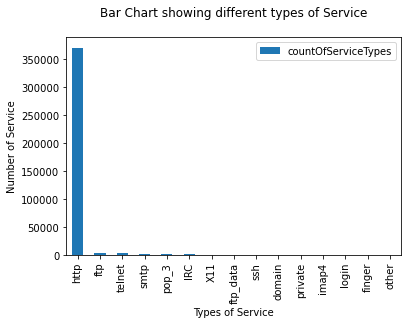

In [40]:
pandasDF = sqlDF.toPandas()
pandasDF.sort_values(by='countOfServiceTypes',ascending=False).plot(x ='service', y='countOfServiceTypes', kind = 'bar')
plt.title('Bar Chart showing different types of Service\n')
plt.xlabel('Types of Service')
plt.ylabel('Number of Service');

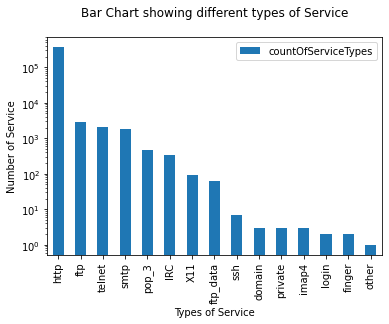

In [42]:
# plotting with logy parameter
pandasDF.sort_values(by='countOfServiceTypes',ascending=False).plot(x ='service', y='countOfServiceTypes', kind = 'bar', logy=True)
plt.title('Bar Chart showing different types of Service\n')
plt.xlabel('Types of Service')
plt.ylabel('Number of Service');